### Set Parameters

In [3]:
pf_id = 5 #problem formulation id; should match file name
n_scenarios = 1000 #should be run with 5000
#n_policies = 0 #doesn't work, ignore

### Run Model for Open Exploration

##### Define a nothing policy (necessary for the code to run)

In [2]:
# don't @ me it has to be set up this way to work
from ema_workbench import Policy
policies = [Policy('policy 0', **{'0_RfR 0':0,
                                  '0_RfR 1':0,
                                  '0_RfR 2':0,
                                  'A.1_DikeIncrease 0':0,
                                  'A.1_DikeIncrease 1':0,
                                  'A.1_DikeIncrease 2':0,
                                  '1_RfR 0':0,
                                  '1_RfR 1':0,
                                  '1_RfR 2':0,
                                  'A.2_DikeIncrease 0':0,
                                  'A.2_DikeIncrease 1':0,
                                  'A.2_DikeIncrease 2':0,
                                  '2_RfR 0':0,
                                  '2_RfR 1':0,
                                  '2_RfR 2':0,
                                  'A.3_DikeIncrease 0':0,
                                  'A.3_DikeIncrease 1':0,
                                  'A.3_DikeIncrease 2':0,
                                  '3_RfR 0':0,
                                  '3_RfR 1':0,
                                  '3_RfR 2':0,
                                  'A.4_DikeIncrease 0':0,
                                  'A.4_DikeIncrease 1':0,
                                  'A.4_DikeIncrease 2':0,
                                  '4_RfR 0':0,
                                  '4_RfR 1':0,
                                  '4_RfR 2':0,
                                  'A.5_DikeIncrease 0':0,
                                  'A.5_DikeIncrease 1':0,
                                  'A.5_DikeIncrease 2':0,
                                  'EWS_DaysToThreat':0
                                  })]

##### Import packages


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### Import things and set up model (with the selected problem formulation)


In [4]:
from ema_workbench.util import ema_logging
from problem_formulation import get_model_for_problem_formulation

ema_logging.log_to_stderr(ema_logging.INFO)

dike_model, planning_steps = get_model_for_problem_formulation(pf_id) #changes for each file

##### Define uncertainties and levers

In [5]:
import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)
levers = copy.deepcopy(dike_model.levers)

##### Run the model with the defined number of scenarios and the nothing policy

In [6]:
from ema_workbench import (ema_logging, MultiprocessingEvaluator, Samplers)
ema_logging.log_to_stderr(ema_logging.INFO)
 
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies, uncertainty_sampling=Samplers.SOBOL)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 10 scenarios * 1 policies * 1 model(s) = 10 experiments
100%|██████████████████████████████████████████| 10/10 [00:05<00:00,  1.85it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


##### Define experiments and outcome; print names of the outcomes

In [27]:
experiments, outcomes = results
print(outcomes.keys())

dict_keys(['A.1_Expected Annual Damage 0', 'A.1_Dike Investment Costs 0', 'A.1_Expected Number of Deaths 0', 'A.2_Expected Annual Damage 0', 'A.2_Dike Investment Costs 0', 'A.2_Expected Number of Deaths 0', 'A.3_Expected Annual Damage 0', 'A.3_Dike Investment Costs 0', 'A.3_Expected Number of Deaths 0', 'A.4_Expected Annual Damage 0', 'A.4_Dike Investment Costs 0', 'A.4_Expected Number of Deaths 0', 'A.5_Expected Annual Damage 0', 'A.5_Dike Investment Costs 0', 'A.5_Expected Number of Deaths 0', 'RfR Total Costs 0', 'Expected Evacuation Costs 0', 'A.1_Expected Annual Damage 1', 'A.1_Dike Investment Costs 1', 'A.1_Expected Number of Deaths 1', 'A.2_Expected Annual Damage 1', 'A.2_Dike Investment Costs 1', 'A.2_Expected Number of Deaths 1', 'A.3_Expected Annual Damage 1', 'A.3_Dike Investment Costs 1', 'A.3_Expected Number of Deaths 1', 'A.4_Expected Annual Damage 1', 'A.4_Dike Investment Costs 1', 'A.4_Expected Number of Deaths 1', 'A.5_Expected Annual Damage 1', 'A.5_Dike Investment Co

### Save Results

In [28]:
from ema_workbench import save_results

save_results(results, './output/open_exploration/Open_Exploration_id_%s.tar.gz'%pf_id)

[MainProcess/INFO] results saved successfully to C:\Users\python\Documents\GitHub\MBDM\final assignment\output\open_exploration\Open_Exploration_id_5.tar.gz


In [29]:
experiments.to_csv('./output/open_exploration/Open_Exploration_id_%s_exp.csv'%pf_id, index=False)
pd.DataFrame.from_dict(outcomes).to_csv('./output/open_exploration/Open_Exploration_id_%s_out.csv'%pf_id, index=False)

### Visualization

##### Import stuff

In [8]:
from ema_workbench.analysis import prim, dimensional_stacking, feature_scoring
from ema_workbench import load_results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### Load in previously saved results; can visualize without rerunning the whole notebook

In [9]:
results = load_results('./output/open_exploration/Open_Exploration_id_%s.tar.gz'%pf_id)
experiments, outcomes = results

##### As a failsafe, drop NaN outcomes by converting to pandas DataFrame

In [10]:
outcomes_pd = pd.DataFrame.from_dict(outcomes)
outcomes_pd.dropna(inplace=True)

##### Convert outcomes back into array dict

In [11]:
outcomes_nonan = outcomes_pd.to_dict('list')

for outcome in outcomes_nonan.keys():
    outcomes_nonan[outcome] = np.array(outcomes_nonan[outcome])

outcomes = outcomes_nonan

##### Drop corresponding runs from experiments

In [12]:
experiments.drop(list(set(experiments.index) - set(outcomes_pd.index)), inplace=True)

## Subspace Partitioning

This is where the names of each outcome will need to be fed into the visualizations to get reasonable outputs, ignore this for now or change the names yourself.

#### Outcome: All Costs

##### Define x, y, and threshold

In [16]:
x = experiments
data = outcomes[list(outcomes.keys())[0]] #outcomes["A.1_Expected Annual Damage 0"]
y = data <  np.percentile(data, 10) # 10 percent of worst outcomes

print(outcomes.keys())

dict_keys(['A.1_Expected Annual Damage 0', 'A.1_Dike Investment Costs 0', 'A.1_Expected Number of Deaths 0', 'A.2_Expected Annual Damage 0', 'A.2_Dike Investment Costs 0', 'A.2_Expected Number of Deaths 0', 'A.3_Expected Annual Damage 0', 'A.3_Dike Investment Costs 0', 'A.3_Expected Number of Deaths 0', 'A.4_Expected Annual Damage 0', 'A.4_Dike Investment Costs 0', 'A.4_Expected Number of Deaths 0', 'A.5_Expected Annual Damage 0', 'A.5_Dike Investment Costs 0', 'A.5_Expected Number of Deaths 0', 'RfR Total Costs 0', 'Expected Evacuation Costs 0', 'A.1_Expected Annual Damage 1', 'A.1_Dike Investment Costs 1', 'A.1_Expected Number of Deaths 1', 'A.2_Expected Annual Damage 1', 'A.2_Dike Investment Costs 1', 'A.2_Expected Number of Deaths 1', 'A.3_Expected Annual Damage 1', 'A.3_Dike Investment Costs 1', 'A.3_Expected Number of Deaths 1', 'A.4_Expected Annual Damage 1', 'A.4_Dike Investment Costs 1', 'A.4_Expected Number of Deaths 1', 'A.5_Expected Annual Damage 1', 'A.5_Dike Investment Co

##### Tradeoff density and coverage

In [18]:
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()
box1.show_tradeoff()
plt.show()

AssertionError: 

##### Dimensional stacking

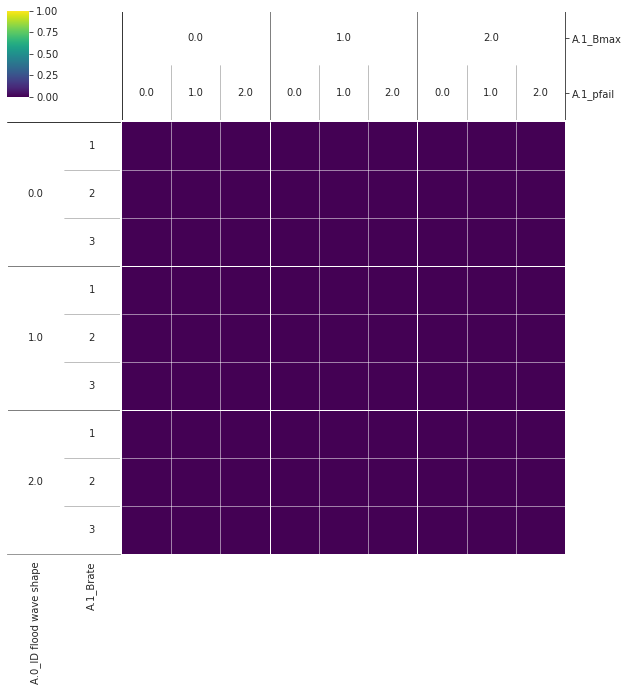

In [19]:
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3)
plt.show()

#### Outcome: Expected Number of Deaths

##### Define x, y, and threshold

In [20]:
x = experiments
data = outcomes["A.5_Expected Number of Deaths 1"]
y = data <  np.percentile(data, 10) # 10 percent of worst outcomes

##### Tradeoff density and coverage

In [21]:
prim_alg = prim.Prim(x, y, threshold=0.8)
box1 = prim_alg.find_box()
box1.show_tradeoff()
plt.show()

AssertionError: 

##### Dimensional stacking


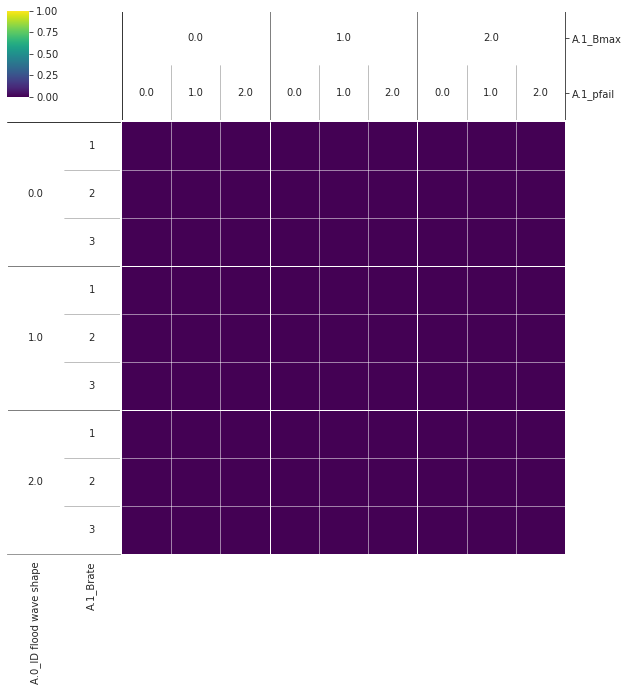

In [22]:
dimensional_stacking.create_pivot_plot(x, y, 2, nbins=3)
plt.show()

### Sensitivity Analysis

### Feature Scoring

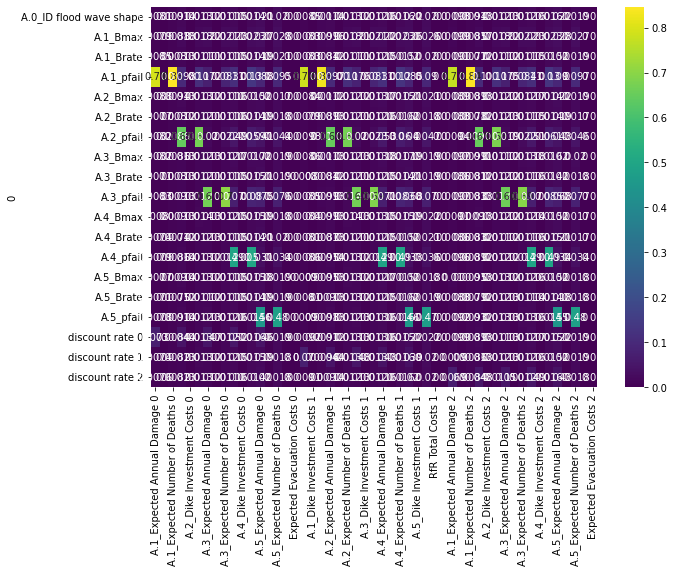

In [23]:
x = experiments.loc[:,['A.0_ID flood wave shape', 'A.1_pfail', 'A.2_pfail', 'A.3_pfail', 'A.4_pfail', 'A.5_pfail', 'A.1_Bmax', 'A.2_Bmax', 'A.3_Bmax', 'A.4_Bmax', 'A.5_Bmax',  'A.1_Brate', 'A.2_Brate', 'A.3_Brate', 'A.4_Brate', 'A.5_Brate', 'discount rate 0', 'discount rate 1', 'discount rate 2']]
y = outcomes

plt.figure(figsize = (10,7))

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap="viridis", annot=True, )

plt.show()